# Modulación
<p><code>Python en Jupyter Notebook</code></p>
<p>Creado por <code>Giancarlo Ortiz</code> para el curso de <code>Redes</code></p>

## Aprovechamiento del medio de transmisión
La modulación engloba un conjunto de técnicas que se usan para transportar información sobre una onda portadora en distintos valores de frecuencia, optimizando el ancho de banda disponible en el medio de transmisión.

### Agenda
1. Modulación análoga con portadora análoga
1. Modulación digital con portadora análoga
1. Modulación digital con portadora análoga

In [5]:
# Importar módulos al cuaderno
import math as m
import numpy as np
import matplotlib.pyplot as plt

# Importar elementos de un módulo al cuaderno
from scipy import signal
from matplotlib.ticker import MultipleLocator
from math import pi
from numpy import sin, cos

## 1. [Modulación análoga con portadora análoga](#agenda)
---
Trasladar una señal análoga en frecuencia usando una onda portadora análoga de mayor frecuencia para un mejor aprovechamiento del canal.

----------------------------------------------
 Frecuencia de la portadora:         740.0 Khz
 Longitud de onda de la portadora:   405.1 mts
----------------------------------------------


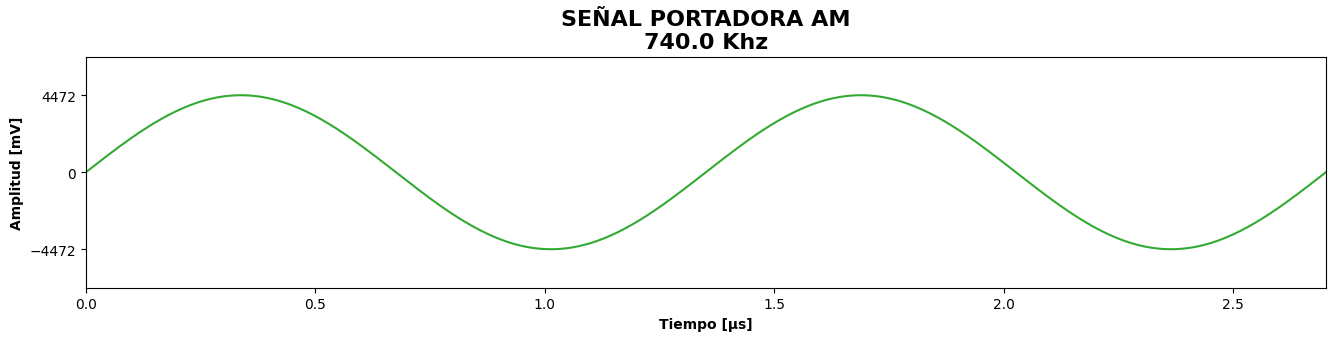

In [2]:
# [iPython] - Gráficas - Caracterización de una señal de AM
# ---------------------------------------------------------
# Ecos de pasto 740 Khz - AM - Onda media
fp = 740_000            # Frecuencia de la portadora
Wp = 2 * pi * fp        # Frecuencia angular de la portadora
c = 299_792_458         # Velocidad de la luz (propagación ondas electromagnéticas)
# Potencia de un transmisor de 1 KW y antena de (50 Ω) - 100Km
Potencia = 1_000
Resistencia = 50
Ap = (Potencia/Resistencia)**(1/2)
λp = c/fp                # Longitud de onda de la portadora 
# Vector de tiempo acorde a la frecuencia de la señal
nλ = 2                 # Número de longitudes de onda visibles
t = np.linspace(0, nλ/fp, 512, endpoint=True)

# Señal portadora de FM
# ---------------------
Sp = Ap * sin(Wp*t)

# Salida estándar
print(f"----------------------------------------------")
print(f" Frecuencia de la portadora:       {fp/1_000:7.1f} Khz")
print(f" Longitud de onda de la portadora: {λp:7.1f} mts")
print(f"----------------------------------------------")

# Gráfica
# Un solo eje una sola gráfica - Señal portadora de AM
# ----------------------------------------------------
plt.figure(figsize=(16,3))
t *= 1_000_000      # Transformando t a μs
Sp *= 1_000         # Transformando s a mV 
plt.plot(t, Sp, color="#33aa33")
# Limites y garrapatas
plt.xlim(t.min(), t.max())
plt.ylim(Sp.min()*1.5, Sp.max()*1.5)
plt.yticks([Sp.min(), 0, Sp.max()])

# Textos en la gráfica
plt.title("Señal portadora AM\n".upper() + 
         f"{fp/1_000:.1f} Khz", fontsize=16, fontweight="bold")
plt.xlabel("Tiempo [μs]", fontweight="bold")
plt.ylabel("Amplitud [mV]", fontweight="bold")
plt.show()

----------------------------------------------
 Frecuencia de la portadora:         101.1 Mhz
 Longitud de onda de la portadora:     3.0 mts
----------------------------------------------


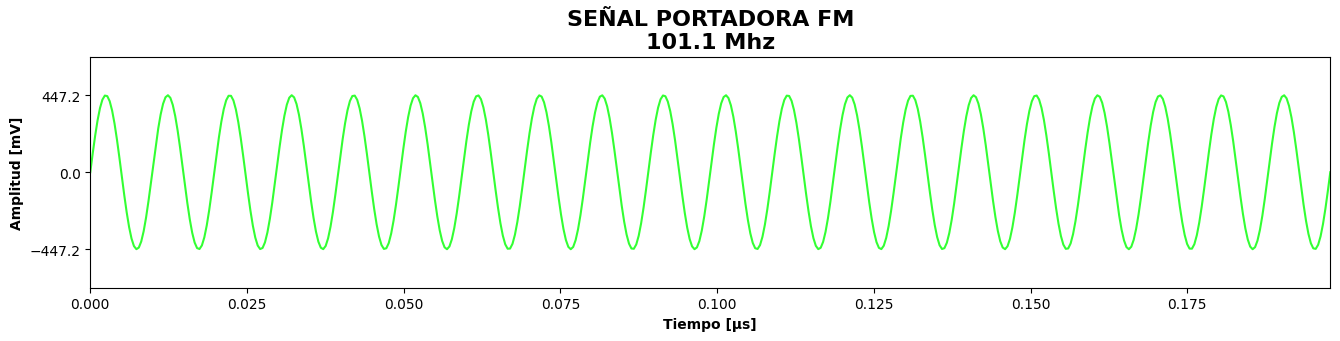

In [3]:
# [iPython] - Gráficas - Caracterización de una señal de FM
# ---------------------------------------------------------
# Emisora Universidad de Nariño 101.1 Mhz - FM
fp = 101_100_000        # Frecuencia de la portadora
Wp = 2 * pi * fp        # Frecuencia angular de la portadora
# Potencia de un transmisor de 10 W y antena de (50 Ω - 10Km)
Potencia = 10
Resistencia = 50
Ap = (Potencia/Resistencia)**(1/2)
# Vector de tiempo acorde a la frecuencia de la señal
nλ = 20                 # Número de longitudes de onda visibles
t = np.linspace(0, nλ/fp, 512, endpoint=True)

# Señal portadora de FM
# ---------------------
Sp = Ap * sin(Wp*t)

# Salida estándar
print(f"----------------------------------------------")
print(f" Frecuencia de la portadora:       {fp/1_000_000:7.1f} Mhz")
print(f" Longitud de onda de la portadora: {299_792_458/fp:7.1f} mts")
print(f"----------------------------------------------")

# Gráfica
# Un solo eje una sola gráfica - Señal portadora de FM
# ----------------------------------------------------
plt.figure(figsize=(16,3))
t *= 1_000_000      # Transformando t a μs
Sp *= 1_000         # Transformando s a mV 
plt.plot(t, Sp, color="#33FF33")
# Limites y garrapatas
plt.xlim(t.min(), t.max())
plt.ylim(Sp.min()*1.5, Sp.max()*1.5)
plt.yticks([Sp.min(), 0, Sp.max()])

# Textos en la gráfica
plt.title("Señal portadora FM\n".upper() + 
         f"{fp/1_000_000:.1f} Mhz", fontsize=16, fontweight="bold")
plt.xlabel("Tiempo [μs]", fontweight="bold")
plt.ylabel("Amplitud [mV]", fontweight="bold")
plt.show()

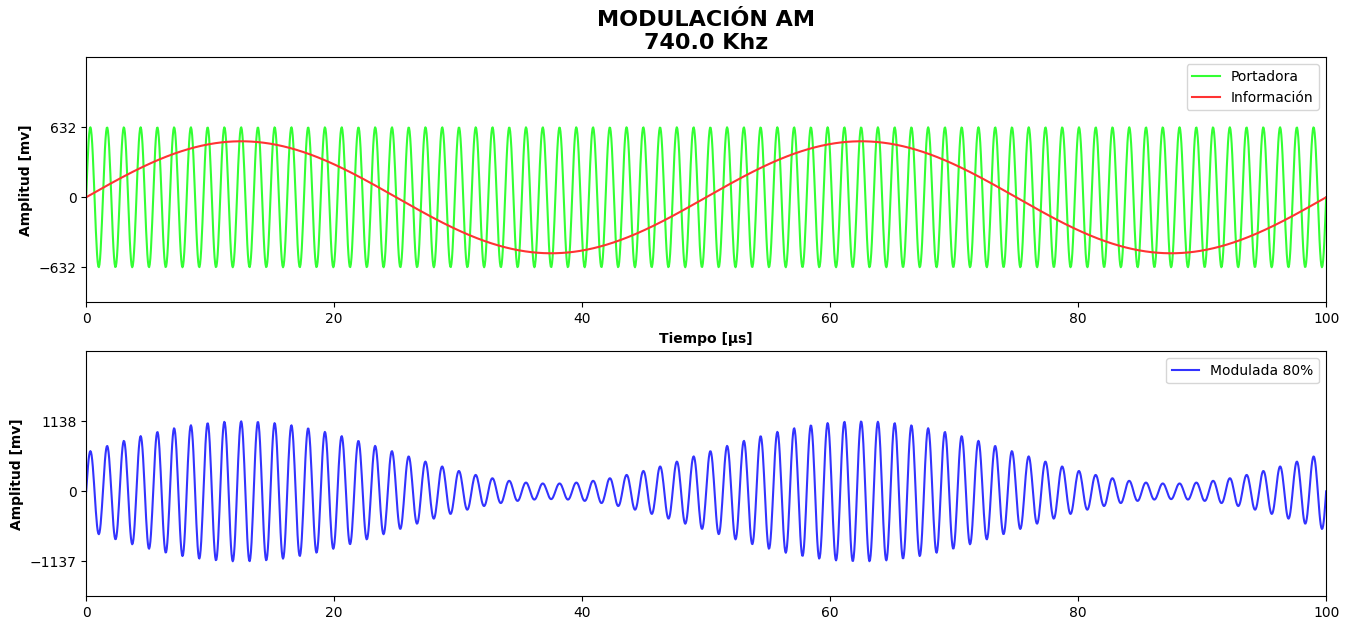

In [4]:
# Modulación AM - Modulación Lineal
# 106 bandas AM posibles de 10Khz entre 540Khz – 1600Khz
# ---------------------------------------------
wb = 10_000             # Ancho de banda de AM 10 khz
h = 80                  # Porcentaje de modulación (índice)
nλ = 2                  # Numero de longitudes de onda visibles

# Parámetros señal 1 - señal de la portadora 
# --------------------------------
fp = 740_000            # Ecos de pasto 740 Khz - AM - Onda media
Potencia = 20           # Potencia de un transmisor de 20 W
Resistencia = 50        # Impedancia de la antena (50 Ω - 10Km)

# Parámetros señal 2 - señal de información de audio
# ---------------------------------------
fi = 20_000             # Frecuencia de una señal de audio

# Frecuencias angulares y amplitudes
Wp = 2 * pi * fp                    # Frecuencia angular de la portadora
Wi = 2 * pi * fi                    # Frecuencia angular de la moduladora
Ap = (Potencia/Resistencia)**(1/2)
Ai = Ap * (h/100)

# Vector de tiempo acorde a la frecuencia de la señal
t  = np.linspace(0, nλ/fi, 2048, endpoint=True)

# Señal portadora de AM
θ = 0
Sp = Ap * sin(Wp*t + θ)
# Señal información
Si = Ai * sin(Wi*t)
# Señales moduladas en AM
#Sm = (Si/Ap + 1) * Sp
#Sm = (Ai/Ap * sin(Wi*t + θ) + 1) * Ap * sin(Wp*t)
Sm = (Ai * sin(Wi*t + θ) + Ap) * sin(Wp*t)
#Sm = Ai * sin(Wi*t + θ) * sin(Wp*t) + Ap * sin(Wp*t)

# Transformando loa valores a escalas apreciables
# ----------------------------------------------------
t *= 1_000_000      # Transformando escala de t a μs
Sp *= 1_000         # Transformando escala de Sp a mV 
Si *= 1_000         # Transformando escala de Si a mV
Sm *= 1_000         # Transformando escala de Sm a mV 

# Gráficas
# Eje 1 - Señal portadora de AM y señal de información
# ----------------------------------------------------
plt.figure(figsize=(16, 7))
plt.subplot(211)
plt.plot(t, Sp, label="Portadora", color="#33FF33")
plt.plot(t, Si, label="Información", color="#FF3333")

plt.xlim(t.min(), t.max())
plt.ylim(Sp.min()*1.5, Sp.max()*2)
plt.yticks([Sp.min(), 0, Sp.max()])
# Textos
plt.title(
    "Modulación AM\n".upper()+f"{fp/1_000:.1f} Khz", fontsize=16, fontweight="bold")
plt.xlabel("Tiempo [μs]", fontweight="bold")
plt.ylabel("Amplitud [mv]", fontweight="bold")
plt.legend()

# Eje 2 - Señal modulada en AM
# ----------------------------
plt.subplot(212)
plt.plot(t, Sm, label=f"Modulada {h}%", color="#3333FF")

plt.xlim(t.min(), t.max())
plt.ylim(Sm.min()*1.5, Sm.max()*2)
plt.yticks([Sm.min(), 0, Sm.max()])

plt.ylabel("Amplitud [mv]", fontweight="bold")
plt.legend()

plt.show()

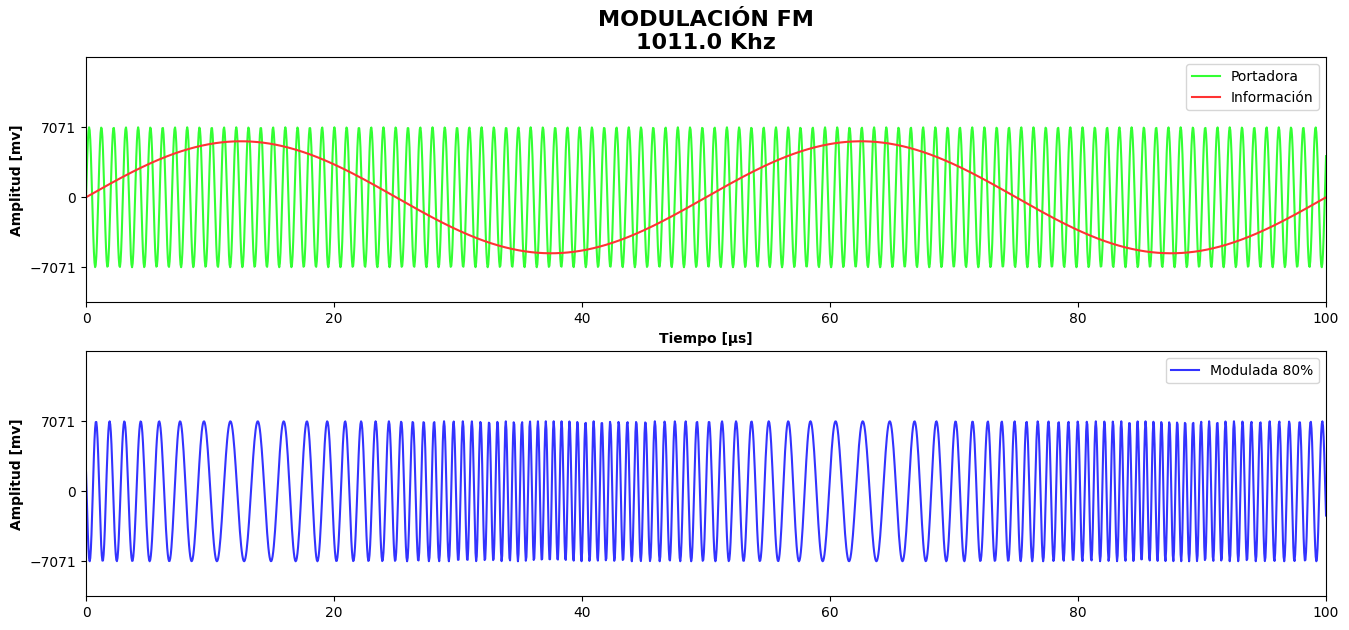

In [42]:
# Modulación FM - Modulación Angular en un solo tono
# 100 bandas FM posibles de 200Khz entre 88.1Mhz – 108.1Mhz
# ---------------------------------------------
wb = 200_000            # Ancho de banda de FM 200 khz
m = 15                  # Indice de modulación
nλ = 2                  # Numero de longitudes de onda visibles

# Parámetros señal 1 - señal de la portadora 
# --------------------------------
fp = 101_100_0          # Emisora Universidad de Nariño 101.1 Mhz - FM
Potencia = 2500         # Potencia de un transmisor de 2000 W
Resistencia = 50        # Impedancia de antena (50 Ω - 10Km)


# Parámetros señal 2 - señal de información de audio
# ---------------------------------------
fi = 20_000             # Frecuencia de una señal de audio

# Frecuencias angulares
Wp = 2 * pi * fp        # Frecuencia angular de la portadora
Wi = 2 * pi * fi        # Frecuencia angular de la moduladora

# Amplitudes
Ap = (Potencia/Resistencia)**(1/2)
Ai = 0.8 * Ap

# Desviación de frecuencia máxima
kf = 500_000            # Sensibilidad de 150 KHz/V
kp = 5                      
mf = kf * Ai/Wi
mp = kp * Ai
mf = -28
mp = -28

# Vector de tiempo acorde a la frecuencia de la señal
t  = np.linspace(0, nλ/fi, 2048, endpoint=True)

# Señal portadora de FM
Sp = Ap * sin(Wp*t)
# Señal información en banda base
Si = Ai * sin(Wi*t)
# Señales moduladas
Sm = Ap * sin(Wp*t - mf*cos(Wi*t))     # Modulada en FM
#Sm = Ap * sin(Wp*t + mp*sin(Wi*t))     # Modulada en PM

# Transformando loa valores a escalas apreciables
# ----------------------------------------------------
t *= 1_000_000      # Transformando escala de t a μs
Sp *= 1_000         # Transformando escala de Sp a mV 
Si *= 1_000         # Transformando escala de Si a mV
Sm *= 1_000         # Transformando escala de Sm a mV 

# Gráficas
# Eje 1 - Señal portadora de FM y señal de información
# ----------------------------------------------------
plt.figure(figsize=(16, 7))
plt.subplot(211)
plt.plot(t, Sp, label="Portadora", color="#33FF33")
plt.plot(t, Si, label="Información", color="#FF3333")

plt.xlim(t.min(), t.max())
plt.ylim(Sp.min()*1.5, Sp.max()*2)
plt.yticks([Sp.min(), 0, Sp.max()])
# Textos
plt.title(
    "Modulación FM\n".upper()+f"{fp/1_000:.1f} Khz", fontsize=16, fontweight="bold")
plt.xlabel("Tiempo [μs]", fontweight="bold")
plt.ylabel("Amplitud [mv]", fontweight="bold")
plt.legend()

# Eje 2 - Señal modulada en FM
# ----------------------------
plt.subplot(212)
plt.plot(t, Sm, label=f"Modulada {h}%", color="#3333FF")

plt.xlim(t.min(), t.max())
plt.ylim(Sm.min()*1.5, Sm.max()*2)
plt.yticks([Sm.min(), 0, Sm.max()])

plt.ylabel("Amplitud [mv]", fontweight="bold")
plt.legend()

plt.show()

## 2. [Modulación análoga con portadora digital](#agenda)
---
Representar la información de una señal análoga en las propiedades de pulsos digitales para un mejor aprovechamiento del canal.

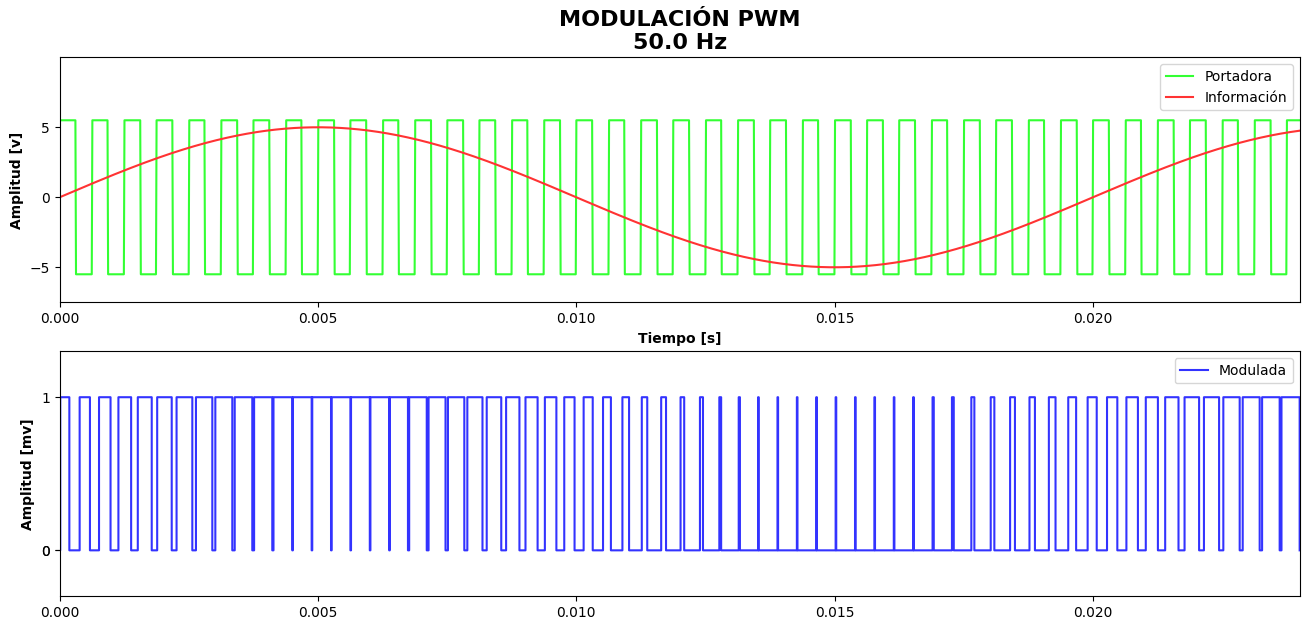

In [7]:
# Modulación análoga PWM
# ---------------------------------------------
precision = 32
nλ = 1.2                  # Numero de longitudes de onda visibles

# Parámetros señal 2 - sensor de temperatura
# ---------------------------------------
fi = 50                 # Frecuencia de una señal de temperatura
Ai = 5                  # Amplitud
Wi = 2 * pi * fi        # Frecuencia angular de la moduladora

# Vector de tiempo acorde a la frecuencia de la señal
t  = np.linspace(0, nλ/fi, 2048, endpoint=True)

# Señal información en banda base
Si = Ai * sin(Wi*t)
Sp = 1.1 * Ai * signal.square(2*pi*precision*fi*t)

señal = []
for index in range(0, len(Si)//precision):
    muestra = Si[index*precision]
    valor = m.ceil((precision * muestra/(2*Si.max()))+ precision/2)
    cadena = "01" + "0" * (precision-2) if valor==1 else "01" + "1" * (valor-2) + "0" * (precision-valor) 
    lista = [int(bit) for bit in cadena]
    señal = señal + lista
    
pwm = np.array(señal)

# Gráficas
# Eje 1 - Señal portadora de FM y señal de información
# ----------------------------------------------------
plt.figure(figsize=(16, 7))
plt.subplot(211)
plt.plot(t, Sp, label="Portadora", color="#33FF33")
plt.plot(t, Si, label="Información", color="#FF3333")

plt.xlim(t.min(), t.max())
plt.ylim(Si.min()*1.5, Si.max()*2)
plt.yticks([Si.min(), 0, Si.max()])
# Textos
plt.title(
    "Modulación PWM\n".upper()+f"{fi:.1f} Hz", fontsize=16, fontweight="bold")
plt.xlabel("Tiempo [s]", fontweight="bold")
plt.ylabel("Amplitud [v]", fontweight="bold")
plt.legend()

# Eje 2 - Señal modulada en PWM
# ----------------------------
plt.subplot(212)
plt.plot(t, pwm, label=f"Modulada", color="#3333FF", drawstyle='steps-post')

plt.xlim(t.min(), t.max())
plt.ylim(-0.3, pwm.max()*1.3)
plt.yticks([pwm.min(), 0, pwm.max()])

plt.ylabel("Amplitud [mv]", fontweight="bold")
plt.legend()

plt.show()

## 3. [Modulación digital con portadora análoga](#agenda)
---
Trasladar una señal digital en frecuencia usando una onda portadora análoga de mayor frecuencia para un mejor aprovechamiento del canal.

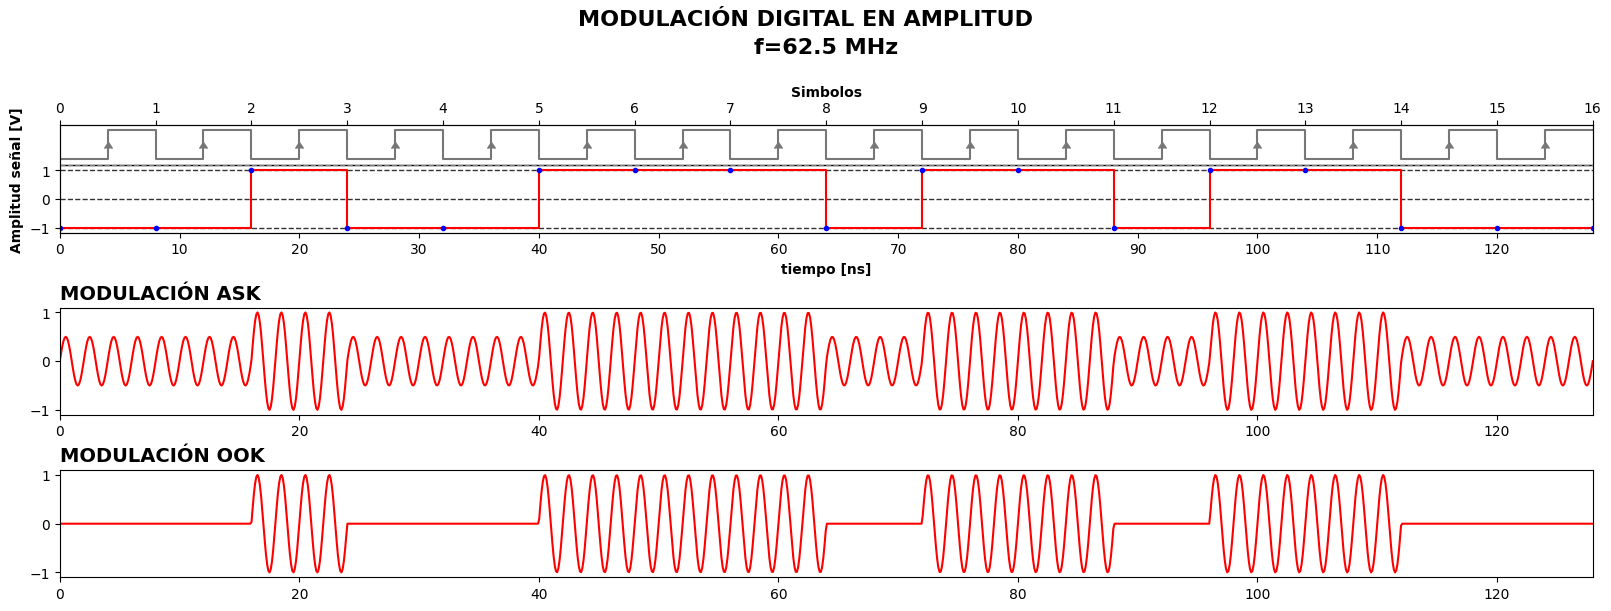

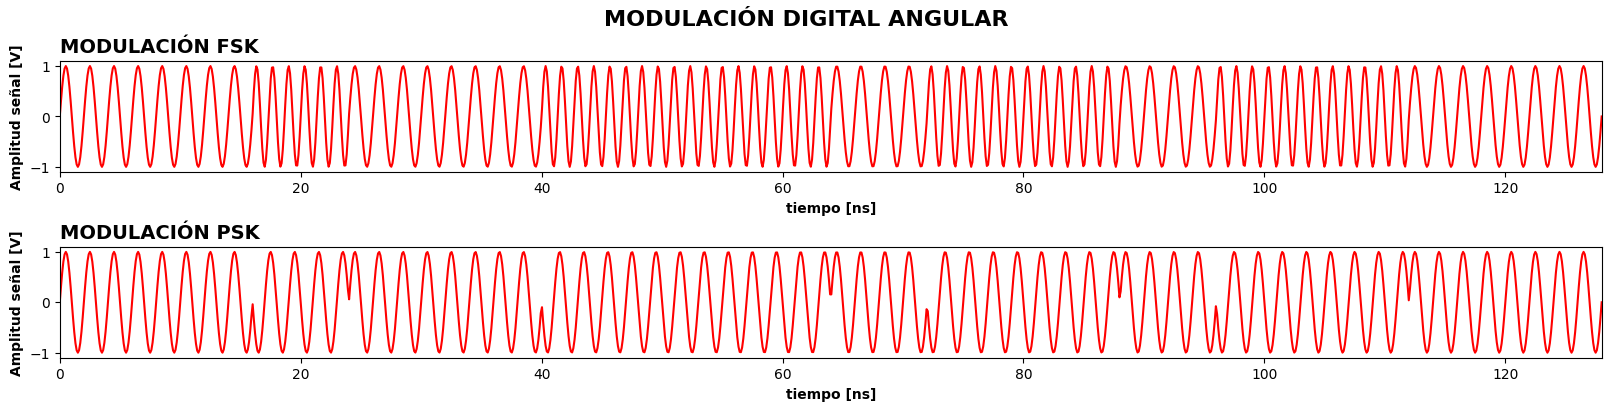

In [16]:
# Parámetros
# ----------------------------------------------------
flanco_de_subida = True
bits = "0010011101101100"
tam_sym = 1
tiempo_de_señal = 8e-9
baudrate = 1/tiempo_de_señal
ancho_de_banda = baudrate/2
fp = 4*baudrate

num_sym = len(bits)//tam_sym

# Código de línea BCD
BCD = {
    "1":1,
    "R":0,
    "0":-1
}

# Codificar
# ----------------------------------------------------
niveles=list(BCD.values())[::-1]
símbolos, señales, clock  = [], [], []
for index in range(0, len(bits)//tam_sym):
    símbolo = bits[tam_sym*index:tam_sym*index+tam_sym]
    símbolos.append(símbolo)
    señales.append(BCD[símbolo])
    clock.append(2)
    clock.append(3)

señales.append(señales[-1])
clock.append(clock[-1])
s = np.array(señales)
c = np.array(clock, dtype=np.float16)-0.6

# Vectores de tiempo
# ----------------------------------------------------
ts = np.arange(0, tiempo_de_señal*(len(símbolos)+1), tiempo_de_señal)
tc = np.arange(0, tiempo_de_señal*(len(símbolos)+1/2), tiempo_de_señal/2)
tm = np.array([tc[i] for i in range(len(tc)) if i % 2 != 0])

# Señal moduladora (Datos Digitales)
distancia = s.max()-s.min()
amplitud_ask = (s-s.min()+distancia)/(2*distancia)
amplitud_ook = (s-s.min())/(distancia)
replicas = 80
Am1 = np.repeat(amplitud_ask, replicas)[:-replicas]
Am2 = np.repeat(amplitud_ook, replicas)[:-replicas]

# Vector de tiempo acorde a la frecuencia de la señal
t = np.linspace(0, ts.max(), len(Am1))

# Modulación en amplitud
Wp = 2 * pi * fp            # Frecuencia angular de la portadora 
Sm1 = Am1 * sin(Wp*t)       # Modulación ASK
Sm2 = Am2 * sin(Wp*t)       # Modulación OOK

# Modulación en frecuencia
Δf = 0.5 * fp * Am2
Δp = pi * Am2
Wp1 = 2 * pi * (fp + Δf)    # Frecuencia angular de la portadora
Sm3 = sin(Wp1*t)            # Modulación FSK
Sm4 = sin(Wp*t + Δp)        # Modulación PSK

# Escala de ejes a valores apreciables
ts = ts*1_000_000_000
tc = tc*1_000_000_000
tm = tm*1_000_000_000
t = t*1_000_000_000
ms = tiempo_de_señal*1e6

# Gráfica
# ----------------------------------------------------
plt.figure(num=1, layout="constrained", figsize=(16, 6))
plt.subplot(311)
plt.plot(tc, c, color="#777", drawstyle='steps-post')
plt.axhline(y = 1.2, color = 'black', linewidth=1, linestyle = '-')

for nivel in niveles:
    plt.axhline(y = nivel, color = '#333', linewidth=1, linestyle = 'dashed')

plt.plot(ts, s, color="red", drawstyle='steps-post')
plt.plot(ts, s, color="blue", drawstyle='steps-post', linestyle = 'None', marker='.')

if flanco_de_subida:
    plt.plot(tm, 2*np.ones(len(tm)), marker=6, color="#777" , linestyle='None')
else:
    plt.plot(tm, 1.9*np.ones(len(tm)), marker=7, color="#777" , linestyle='None')

# Garrapatas
plt.yticks(niveles)
plt.xticks(list(np.arange(0,tc.max(),10)))
plt.xlim(tc.min(), tc.max())
#plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%2.0E'))

# Textos en la gráfica
plt.suptitle("Modulación digital en amplitud".upper(), fontsize=16, fontweight="bold")
plt.title(f"f={ancho_de_banda/1e6:.1f} MHz\n", fontsize=16, fontweight="bold")
plt.ylabel("Amplitud señal [V]", fontweight="bold")
plt.xlabel("tiempo [ns]", fontweight="bold")

# Escala de tiempo en micro-segundos
ax2 = plt.twiny()
ax2.plot([0, num_sym], [1.2, 1.2], color="gray", linewidth=1, linestyle='dashed')
ax2.xaxis.tick_top()
ax2.xaxis.set_label_position("top")
ax2.set_xlabel("Simbolos", fontweight="bold")
ax2.xaxis.set_major_locator(MultipleLocator(1))
plt.xlim(0, num_sym)

plt.subplot(312)
plt.title("Modulación ASK".upper(), loc="left", fontsize=14, fontweight="bold")
plt.plot(t, Sm1, color="red")
plt.xlim(t.min(), t.max())

plt.subplot(313)
plt.title("Modulación OOK".upper(), loc="left", fontsize=14, fontweight="bold")
plt.plot(t, Sm2, color="red")
plt.xlim(t.min(), t.max())

plt.show()

plt.figure(num=2, layout="constrained", figsize=(16, 4))
plt.suptitle("Modulación digital Angular".upper(), fontsize=16, fontweight="bold")

plt.subplot(211)
plt.title("Modulación FSK".upper(), loc="left", fontsize=14, fontweight="bold")
plt.ylabel("Amplitud señal [V]", fontweight="bold")
plt.xlabel("tiempo [ns]", fontweight="bold")
plt.plot(t, Sm3, color="red")
plt.xlim(t.min(), t.max())

plt.subplot(212)
plt.title("Modulación PSK".upper(), loc="left", fontsize=14, fontweight="bold")
plt.ylabel("Amplitud señal [V]", fontweight="bold")
plt.xlabel("tiempo [ns]", fontweight="bold")
plt.plot(t, Sm4, color="red")
plt.xlim(t.min(), t.max())

plt.show()

## 4. [Modulación digital con portadora digital](#agenda)
---
Trasladar una señal digital en frecuencia usando una onda digital análoga de mayor frecuencia para un mejor aprovechamiento del canal.

In [8]:
Kp = 6.79e-34           # Constante de Plank [J.s]
Vc = 299_792_458        # Velocidad de la luz [m.s]
λp = Vc / fp            # Longitud de onda de la portadora [m]
Ep = Kp * fp            # Energía [J]
Pp = 3600 * Ep

# Diccionario de frecuencias de la luz en Thz
frecuencias = {"Infrarrojo":337, "Rojo":470, "Amarillo":496, "Verde":581, "Azul": 641, "Violeta":744}

# Salida estándar - Formateo de cadenas
print(f"------------------------------------------------------------------------")
print(f"|   Frecuencia de la portadora:        | {fp:20.2e} Hz       |")
print(f"|   Longitud de onda de la portadora:  | {λp:20.2e} Mts      |")
print(f"|   Energía de la portadora:           | {Ep:20.2e} Julios   |")
print(f"|   Potencia de la portadora (1h):     | {Pp:20.2e} Vatios   |")
print(f"------------------------------------------------------------------------")
print(f"|  Color de la Luz | FRECUENCIA | LONGITUD ONDA |  ENERGÍA  | POTENCIA |")
print(f"------------------------------------------------------------------------")
for key in frecuencias:
    color = key
    f = frecuencias[key] * 1e12
    λ = Vc / f
    e = Kp * f
    p = 3600 * e
    print(f"|       {color:>10} | {f:10.2e} |  {λ:11.2e}  |  {e:7.2e} | {p:7.2e} |")

print(f"------------------------------------------------------------------------")

------------------------------------------------------------------------
|   Frecuencia de la portadora:        |             5.00e+08 Hz       |
|   Longitud de onda de la portadora:  |             6.00e-01 Mts      |
|   Energía de la portadora:           |             3.39e-25 Julios   |
|   Potencia de la portadora (1h):     |             1.22e-21 Vatios   |
------------------------------------------------------------------------
|  Color de la Luz | FRECUENCIA | LONGITUD ONDA |  ENERGÍA  | POTENCIA |
------------------------------------------------------------------------
|       Infrarrojo |   3.37e+14 |     8.90e-07  |  2.29e-19 | 8.24e-16 |
|             Rojo |   4.70e+14 |     6.38e-07  |  3.19e-19 | 1.15e-15 |
|         Amarillo |   4.96e+14 |     6.04e-07  |  3.37e-19 | 1.21e-15 |
|            Verde |   5.81e+14 |     5.16e-07  |  3.94e-19 | 1.42e-15 |
|             Azul |   6.41e+14 |     4.68e-07  |  4.35e-19 | 1.57e-15 |
|          Violeta |   7.44e+14 |     4.03e-07  |  

---
## Mas Recursos
- [Amplitud modulada](https://es.wikipedia.org/wiki/Amplitud_modulada) (Wikipedia)
- [Frecuencia modulada](https://es.wikipedia.org/wiki/Frecuencia_modulada) (Wikipedia)
- [Modulación de fase](https://es.wikipedia.org/wiki/Modulaci%C3%B3n_de_fase) (Wikipedia)
- [Modulación por desplazamiento de amplitud](https://es.wikipedia.org/wiki/Modulaci%C3%B3n_por_desplazamiento_de_amplitud) (Wikipedia)
- [Modulación por desplazamiento de frecuencia](https://es.wikipedia.org/wiki/Modulaci%C3%B3n_por_desplazamiento_de_frecuencia) (Wikipedia)
- [Modulación por desplazamiento de fase](https://es.wikipedia.org/wiki/Modulaci%C3%B3n_por_desplazamiento_de_fase) (Esquemático)
- [AM Transmitter Specifications](https://broadcaststoreeurope.com/upload_dir/shop/Nautel-J1000-specs.pdf) 
(PDF)
